# Renata Ramos - Shape Challenge

09 de Novembro de 2023

# Objective

To enable the operations of an FPSO, we use sensors to make sure the equipment does not fail. These sensors measure different parameters of the equipment in different setup configurations (preset 1 and preset 2) over time. 

We want you to investigate one piece of equipment in different time cycles to understand what characteristics and parameters of the sensors might indicate that the equipment is on the verge of failing.

# Questions

1 – Calculate how many times the equipment has failed.

2 – Categorize equipment failures by setups configurations (preset 1 and preset 2).

3 – Categorize equipment failures by their nature/root cause according to parameter readings (temperature, pressure, and others).

4 – Create a model using the technique you think is most appropriate and measure its performance.

5 – Analyze variable importance.


# Solution

## Read and Visualize the Dataset

First, I read the dataset using pandas.

Then, to have a broad comprehension of the data, I analyzed the histogram of Presets 1 and 2 and the statistical distribution of the continuous variables (Temperature, Pressure and Vibration).


In [7]:
# Install package seaborn on Jupyter Notebook
#!pip install seaborn

In [8]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
#import sys
#!{sys.executable} -m pip install seaborn
#%pip install seaborn
import seaborn as sns

# Read data
df = pd.read_csv("O_G_Equipment_Data.csv", sep = ";", decimal = ",")
df

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.2352,47.6573,46.4418,64.8203,66.4545,44.4832,0
1,2,2,4,60.8072,63.1721,62.0060,80.7144,81.2464,60.2287,0
2,3,2,1,79.0275,83.0322,82.6421,98.2544,98.7852,80.9935,0
3,4,2,3,79.7162,100.5086,122.3623,121.3634,118.6525,80.3156,0
4,5,2,5,39.9891,51.7648,42.5143,61.0379,50.7165,64.2452,0
...,...,...,...,...,...,...,...,...,...,...
795,796,2,6,50.4695,98.2354,151.5853,99.3414,148.8385,49.8414,1
796,797,1,4,49.9853,160.4336,110.9530,160.7772,109.9176,110.9193,1
797,798,1,4,79.7773,110.5354,61.3350,149.5778,129.4638,70.8534,1
798,799,2,8,79.3603,159.9854,61.7629,169.7738,130.2134,80.1135,1


Text(0, 0.5, 'Frequency')

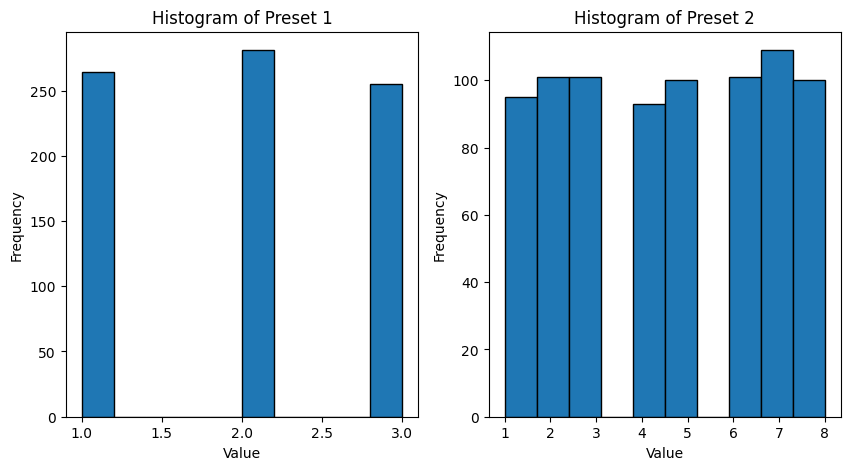

In [9]:
# Plot the histograms of Presets 1 and 2
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(df['Preset_1'], edgecolor='black')  
axes[0].set_title('Histogram of Preset 1')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Preset_2'], edgecolor='black')  
axes[1].set_title('Histogram of Preset 2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')


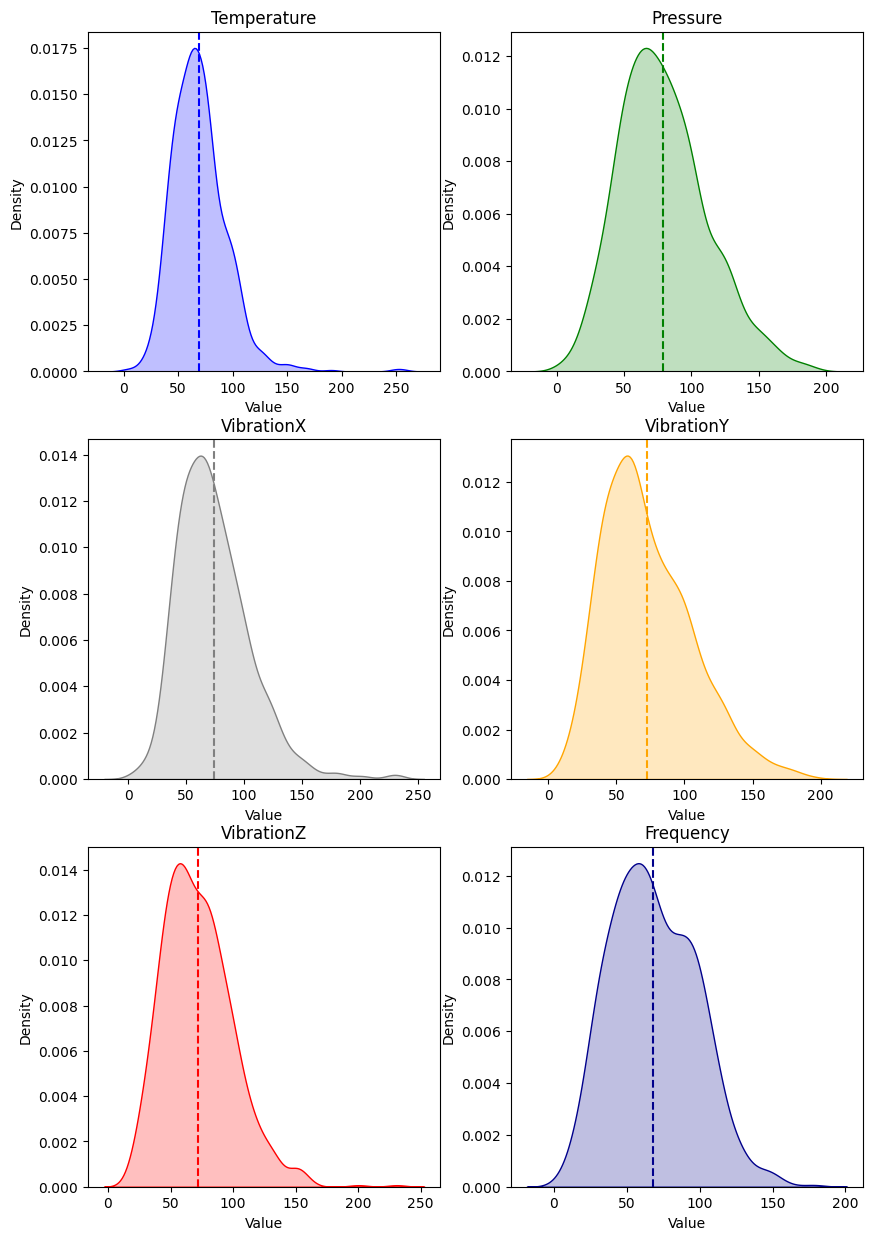

In [13]:
# Plot the distributions of the continuous variables
fig2,axes2 = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes2 = axes2.ravel()
colors = ['blue', 'green', 'grey', 'orange', 'red', 'darkblue']
for i,var in enumerate(df.columns.values[3:-1]):
    sns.kdeplot(df[var], fill=True, ax=axes2[i], color=colors[i])
    axes2[i].set_title(var)
    axes2[i].set_xlabel('Value')
    axes2[i].set_ylabel('Density')
    axes2[i].axvline(df[var].mean(), color=colors[i], linestyle='--')



From the visualization above, I can see that the continuous dataset have a distribution similar to the Normal distribution.

Additionally, I can see that they have approximately the same range and average values.

The table below shows the basic statistical description for the continuous variables.


In [20]:
# statistical description of continuous variables
stats = df[df.columns[3:-1]].describe()
stats


,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.263493,78.997944,73.860273,72.786877,71.866213,68.223448
std,25.536251,32.501834,31.229629,32.739745,27.844618,29.138704
min,2.089400,3.480300,3.846300,10.057700,18.784200,4.380100
25%,51.040125,55.508550,50.752450,48.524000,50.787625,45.861725
50%,65.906700,75.014850,69.394950,65.504750,69.319250,65.664300
75%,80.527225,99.302500,90.195050,94.075600,88.891225,90.097425
max,255.607800,189.995700,230.861100,193.569900,230.951100,178.090300



## Question 1

How many times the equipment has failed? 
   
   66 times

In [15]:
df['Fail'].value_counts()

0    734
1     66
Name: Fail, dtype: int64

## Question 2

Categorize equipment failures by setups configurations (preset 1 and preset 2).

In [57]:
# Create DataFrame for failures
fails = df[df['Fail'] == 1]

# Group both original data and failures by preset configuration
grouped_data = df.groupby(['Preset_1', 'Preset_2']).groups
grouped_fails = fails.groupby(['Preset_1', 'Preset_2']).groups
grouped_fails


{(1, 1): [12, 424, 429, 793], (1, 2): [162, 416, 417, 430, 709], (1, 3): [423, 550], (1, 4): [796, 797], (1, 5): [163, 164, 431, 539, 552], (1, 6): [415, 549, 792], (1, 7): [418, 419, 422, 428], (1, 8): [262, 263], (2, 1): [541, 542, 699, 701], (2, 2): [706, 712], (2, 3): [545, 553], (2, 4): [270], (2, 5): [157, 540, 705], (2, 6): [420, 703, 795], (2, 7): [551, 794], (2, 8): [538, 544, 702, 798], (3, 1): [156, 427, 799], (3, 2): [426, 537], (3, 3): [264, 414], (3, 5): [158, 704, 708, 710], (3, 6): [269, 543, 711], (3, 7): [421, 425, 707], (3, 8): [700]}

In [56]:
# Count errors per preset configuration
grouped_fails_count = fails.groupby(['Preset_1', 'Preset_2']).size().reset_index(name='count_failures')
grouped_fails_count

,Preset_1,Preset_2,count_failures
0,1,1,4
1,1,2,5
2,1,3,2
3,1,4,2
4,1,5,5
5,1,6,3
6,1,7,4
7,1,8,2
8,2,1,4
9,2,2,2


Observation: there has not been found any failures for the combination of presets (3,4).

## Question 3

Categorize equipment failures by their nature/root cause according to parameter readings (temperature, pressure, and others).

In [78]:
# categorization by the continuous variables
# Cumulative probability of 85% for the Normal Distribution
# (1.04 times the standard deviation)
causes = pd.DataFrame(fails['Cycle'])
for i,var in enumerate(fails.columns.values[3:-1]):
    causes[var+'_fail'] = 0 # add column
    ub = stats[var]['mean'] + 1.04 * stats[var]['std'] # upper bound of the confidence interval
    causes.loc[fails[var] > ub, var+'_fail'] = 1

causes


,Cycle,Temperature_fail,Pressure_fail,VibrationX_fail,VibrationY_fail,VibrationZ_fail,Frequency_fail
12,13,0,0,1,1,1,0
156,157,0,0,0,0,1,0
157,158,0,0,0,1,0,1
158,159,0,0,0,1,0,0
162,163,1,0,0,1,0,1
...,...,...,...,...,...,...,...
795,796,0,0,1,0,1,0
796,797,0,1,1,1,1,1
797,798,0,0,0,1,1,0
798,799,0,1,0,1,1,0


The categorization of failures by nature was based on the highest values of the continuous variables. A value was considered high if its probability of occurence in a normal distribution based on the data was less than 15%.

## Question 4

Create a model using the technique you think is most appropriate and measure its performance.

## Logistic Regression

For this question, I first decided to apply a simple Logistic Regression Model and check its accuracy.
It is always advisable to start with the less computational demanding models than with a complex one.

Model Accuracy: 0.95


Text(50.722222222222214, 0.5, 'True Label')

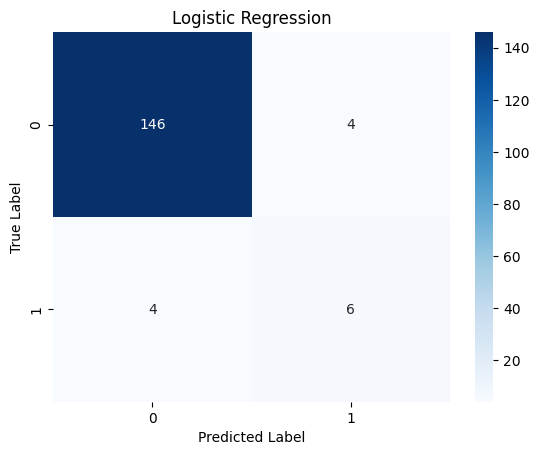

In [69]:
# Prediction model - Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# Split data into features and target
X = df.drop(['Fail','Cycle'], axis=1)
y = df['Fail']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for continuous and discrete variables
continuous_cols = ['Temperature', 'Pressure', 'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency']
discrete_cols = ['Preset_1', 'Preset_2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(), discrete_cols)
    ])

# Create a pipeline that first transforms data and then fits a logistic model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn (for a nicer looking heatmap)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Logistic Regression with Anomaly Detection

Although the results above show 95% accuracy, this model correctly predicts only 60% of the test set failures. This is a poor prediction since the cost of not identifying a possible failure is high.

When we have a classification problem with imbalanced data and when the smallest class of data (the failures) is the most important one, we have an Anomaly Detection problem.

To tackle this imbalance and improve recall and precision for the minority class, it is advisible to adjust the weights so the model optimization takes a great cost in not correctly predicting failures.

The downside of this approach is that it might also increase the false positives. It's a trade-off that needs to be carefully evaluated based on the specific requirements of the project.

Model Accuracy: 0.925


Text(50.722222222222214, 0.5, 'True Label')

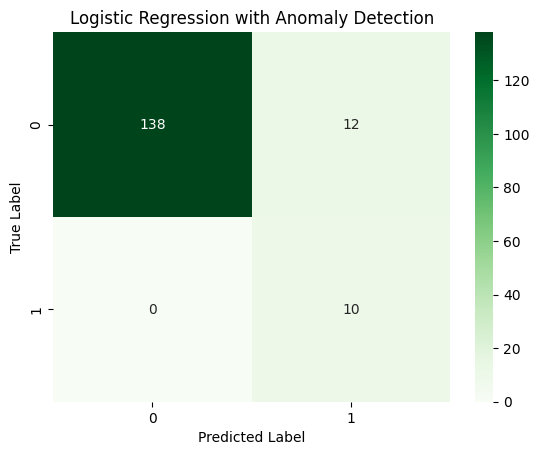

In [76]:
# Create a pipeline that first transforms data and then fits a logistic model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(class_weight='balanced'))])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn (for a nicer looking heatmap)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression with Anomaly Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Here we see that all the failures in the test set have been correctly predicted, even though there's a slight decrease in overall accuracy from 95% to 92.5%.

Additionally, as indicated earlier, there has been an increase in the number of false positives. Despite these variations, the overall performance of the model remains satisfactory.

## Isolation Forest

The Isolation Forest model, which is ensemble of decision trees, is also indicated for anomaly detection problems.



Model Accuracy: 0.86625


Text(50.722222222222214, 0.5, 'True Label')

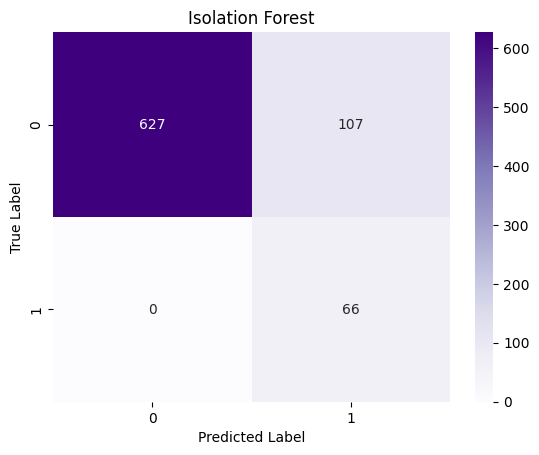

In [75]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# Create the model
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model
isolation_forest.fit(df.iloc[:,1:])

# Predict anomalies (-1 for outliers, 1 for inliers)
anomalies = isolation_forest.predict(df.iloc[:,1:])
anomalies[anomalies == 1] = 0
anomalies[anomalies == -1] = 1

# Generate the confusion matrix
accuracy = accuracy_score(df['Fail'], anomalies)
print(f'Model Accuracy: {accuracy}')
cm = confusion_matrix(df['Fail'], anomalies)

# Plot using Seaborn (for a nicer looking heatmap)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Isolation Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

From the results above, it's evident that the model has successfully predicted all failures. However, it's important to note that the rate of false positives is significantly higher compared to that of the Logistic Regression Model with Anomaly Detection. 

Consequently, this last one was selected as the preferred choice over the others.


## Question 5

Analyze variable importance.

## Sensitivity Analysis

The most aproppriate way to make a sensitivity analysis depends on the machine learning model used.

For the non-parametric or the highly parametric models such as Isolation Forests and Neural Networks, it is possible to apply techniques such as "What-if Analysis" and "Shapley Values".

However, since the Logistic Regression model is a parametric one, a simple coefficient analysis might be applied. The greater a coefficient is, the most important its related variable is.

In [73]:
# Get the coefficients
logmodel = pipeline.named_steps['classifier']
colnames = ['Temperature', 'Pressure', 'VibrationX', 'VibrationY',
            'VibrationZ', 'Frequency', 'Preset1_1', 'Preset1_2', 'Preset1_3',
            'Preset2_1', 'Preset2_2', 'Preset2_3', 'Preset2_4',
            'Preset2_5', 'Preset2_6', 'Preset2_7', 'Preset2_8']
coefficients = pd.DataFrame({'Feature': colnames, 'Coefficient': logmodel.coef_[0]})

# Sort the features by the absolute value of their coefficient
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(sorted_coefficients)

        Feature  Coefficient  Absolute Coefficient
5     Frequency     2.094523              2.094523
2    VibrationX     1.759371              1.759371
3    VibrationY     1.695644              1.695644
4    VibrationZ     1.382192              1.382192
0   Temperature     1.267239              1.267239
15    Preset2_7    -1.002910              1.002910
1      Pressure     0.731227              0.731227
13    Preset2_5     0.550958              0.550958
16    Preset2_8     0.504764              0.504764
9     Preset2_1     0.319040              0.319040
6     Preset1_1     0.301905              0.301905
12    Preset2_4    -0.192702              0.192702
10    Preset2_2    -0.167242              0.167242
7     Preset1_2    -0.166660              0.166660
8     Preset1_3    -0.135143              0.135143
11    Preset2_3    -0.053848              0.053848
14    Preset2_6     0.042042              0.042042


As the table shows, the Frequecy variable is the one that most affects the model, followed by the Vibrations X, Y and Z.